<a href="https://colab.research.google.com/github/akshaytripathi09/CLASSIFICATION-USING-ANN-CHURN-MODELING-/blob/main/Copy_of_Classification_using_ANN_(CM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER CHURN PREDICTION USING ANN


###In this tutorial you will solve classification problem where in we have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## IIMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline
from IPython.display import display
# removing warnings
import sys
import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")


In [2]:
print(tensorflow.__version__)

2.15.0


## Importing Dataset

In [3]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 'RowNumber')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Some columns are totally unproductive so let's remove them
df.drop(['CustomerId','Surname'],axis = 1, inplace = True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Some columns have text data so let's one encode them
# for more one hot encoding click this link below

df = pd.get_dummies(prefix = 'Geo',data = df,columns=['Geography'])

In [10]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
df = df.replace(to_replace={'Gender': {'Female': 1, 'Male': 0}})

In [12]:
df.shape

(10000, 13)

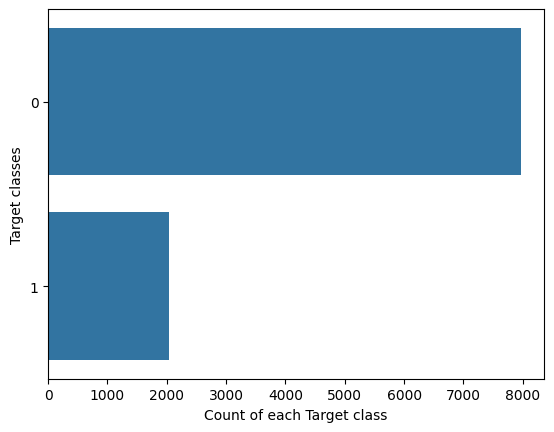

In [13]:
sns.countplot(y=df.Exited ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

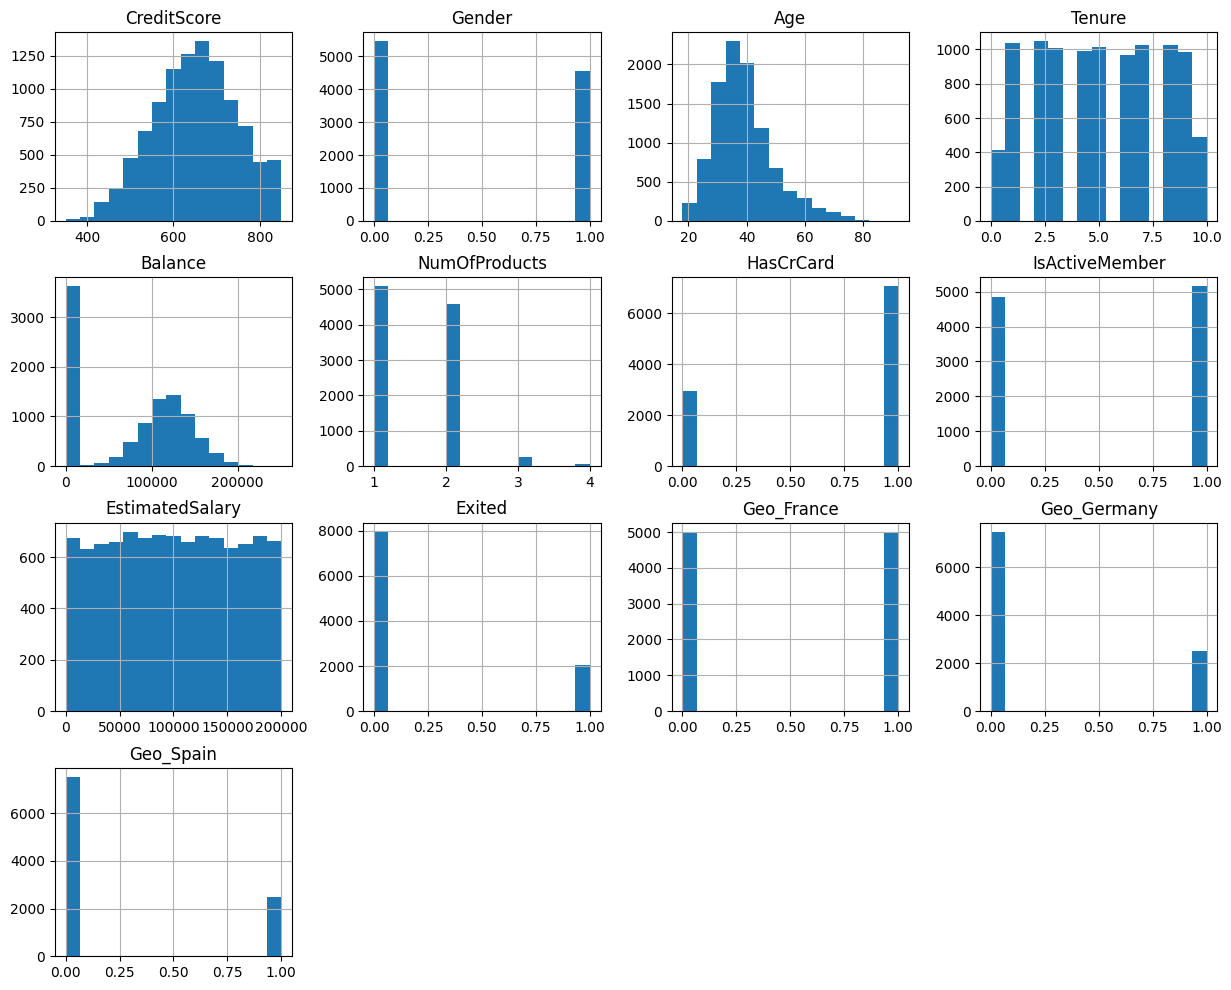

In [14]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

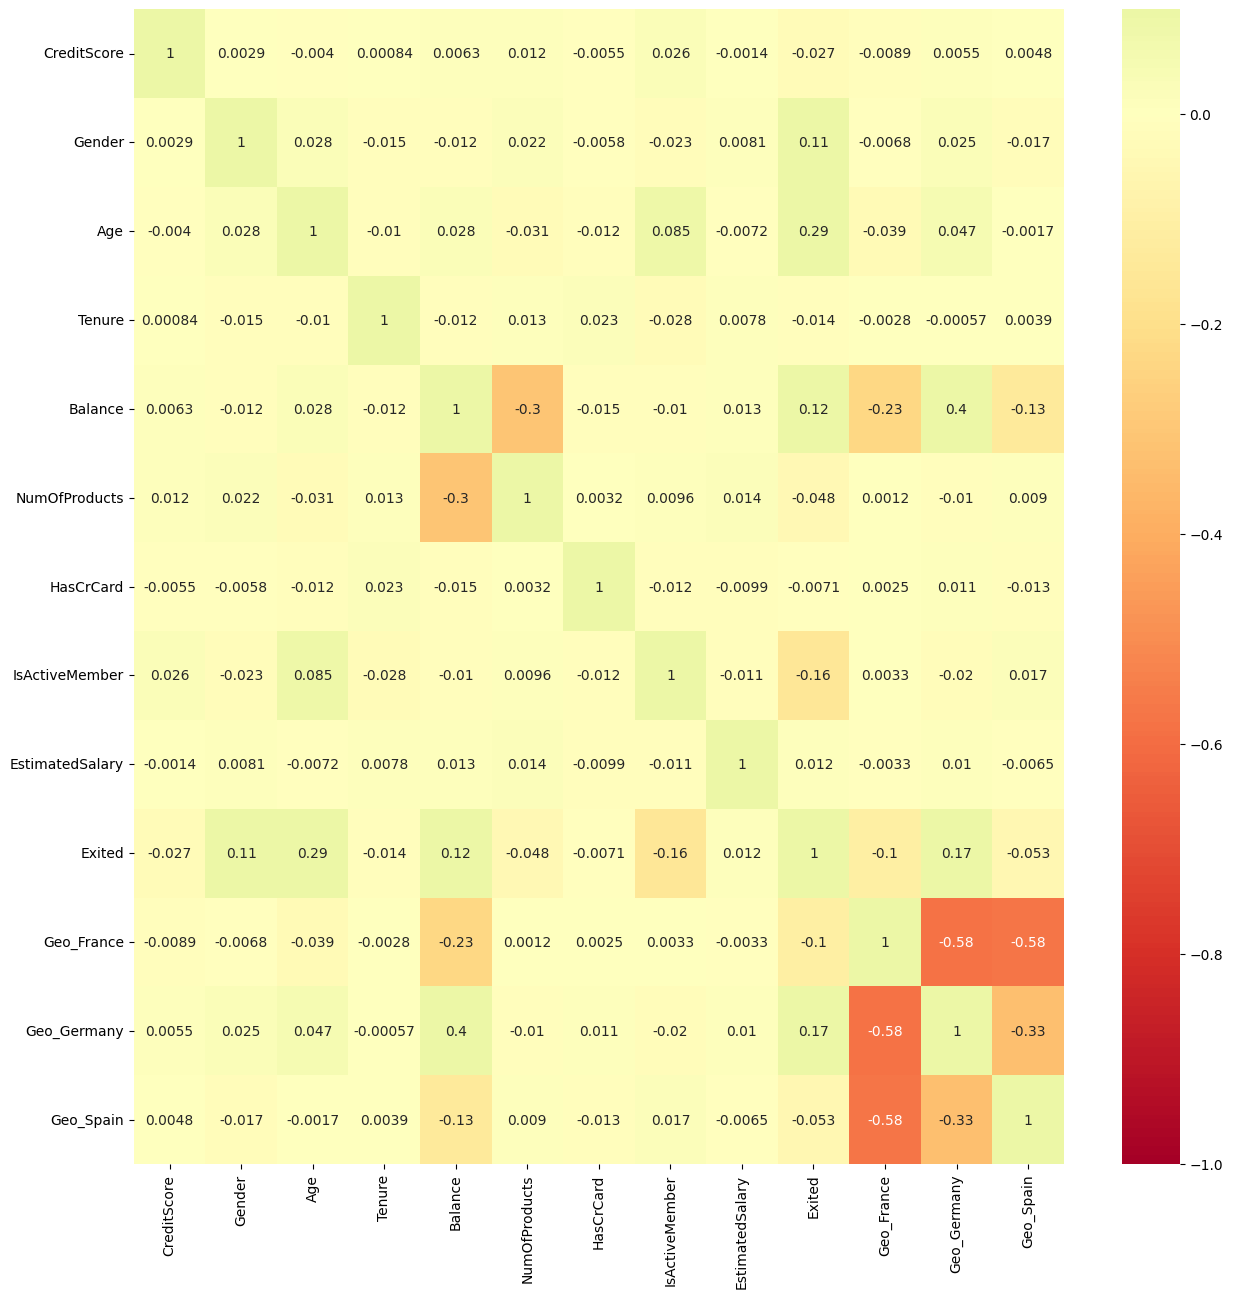

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',center=0, vmax=0.1, vmin=-1.0)

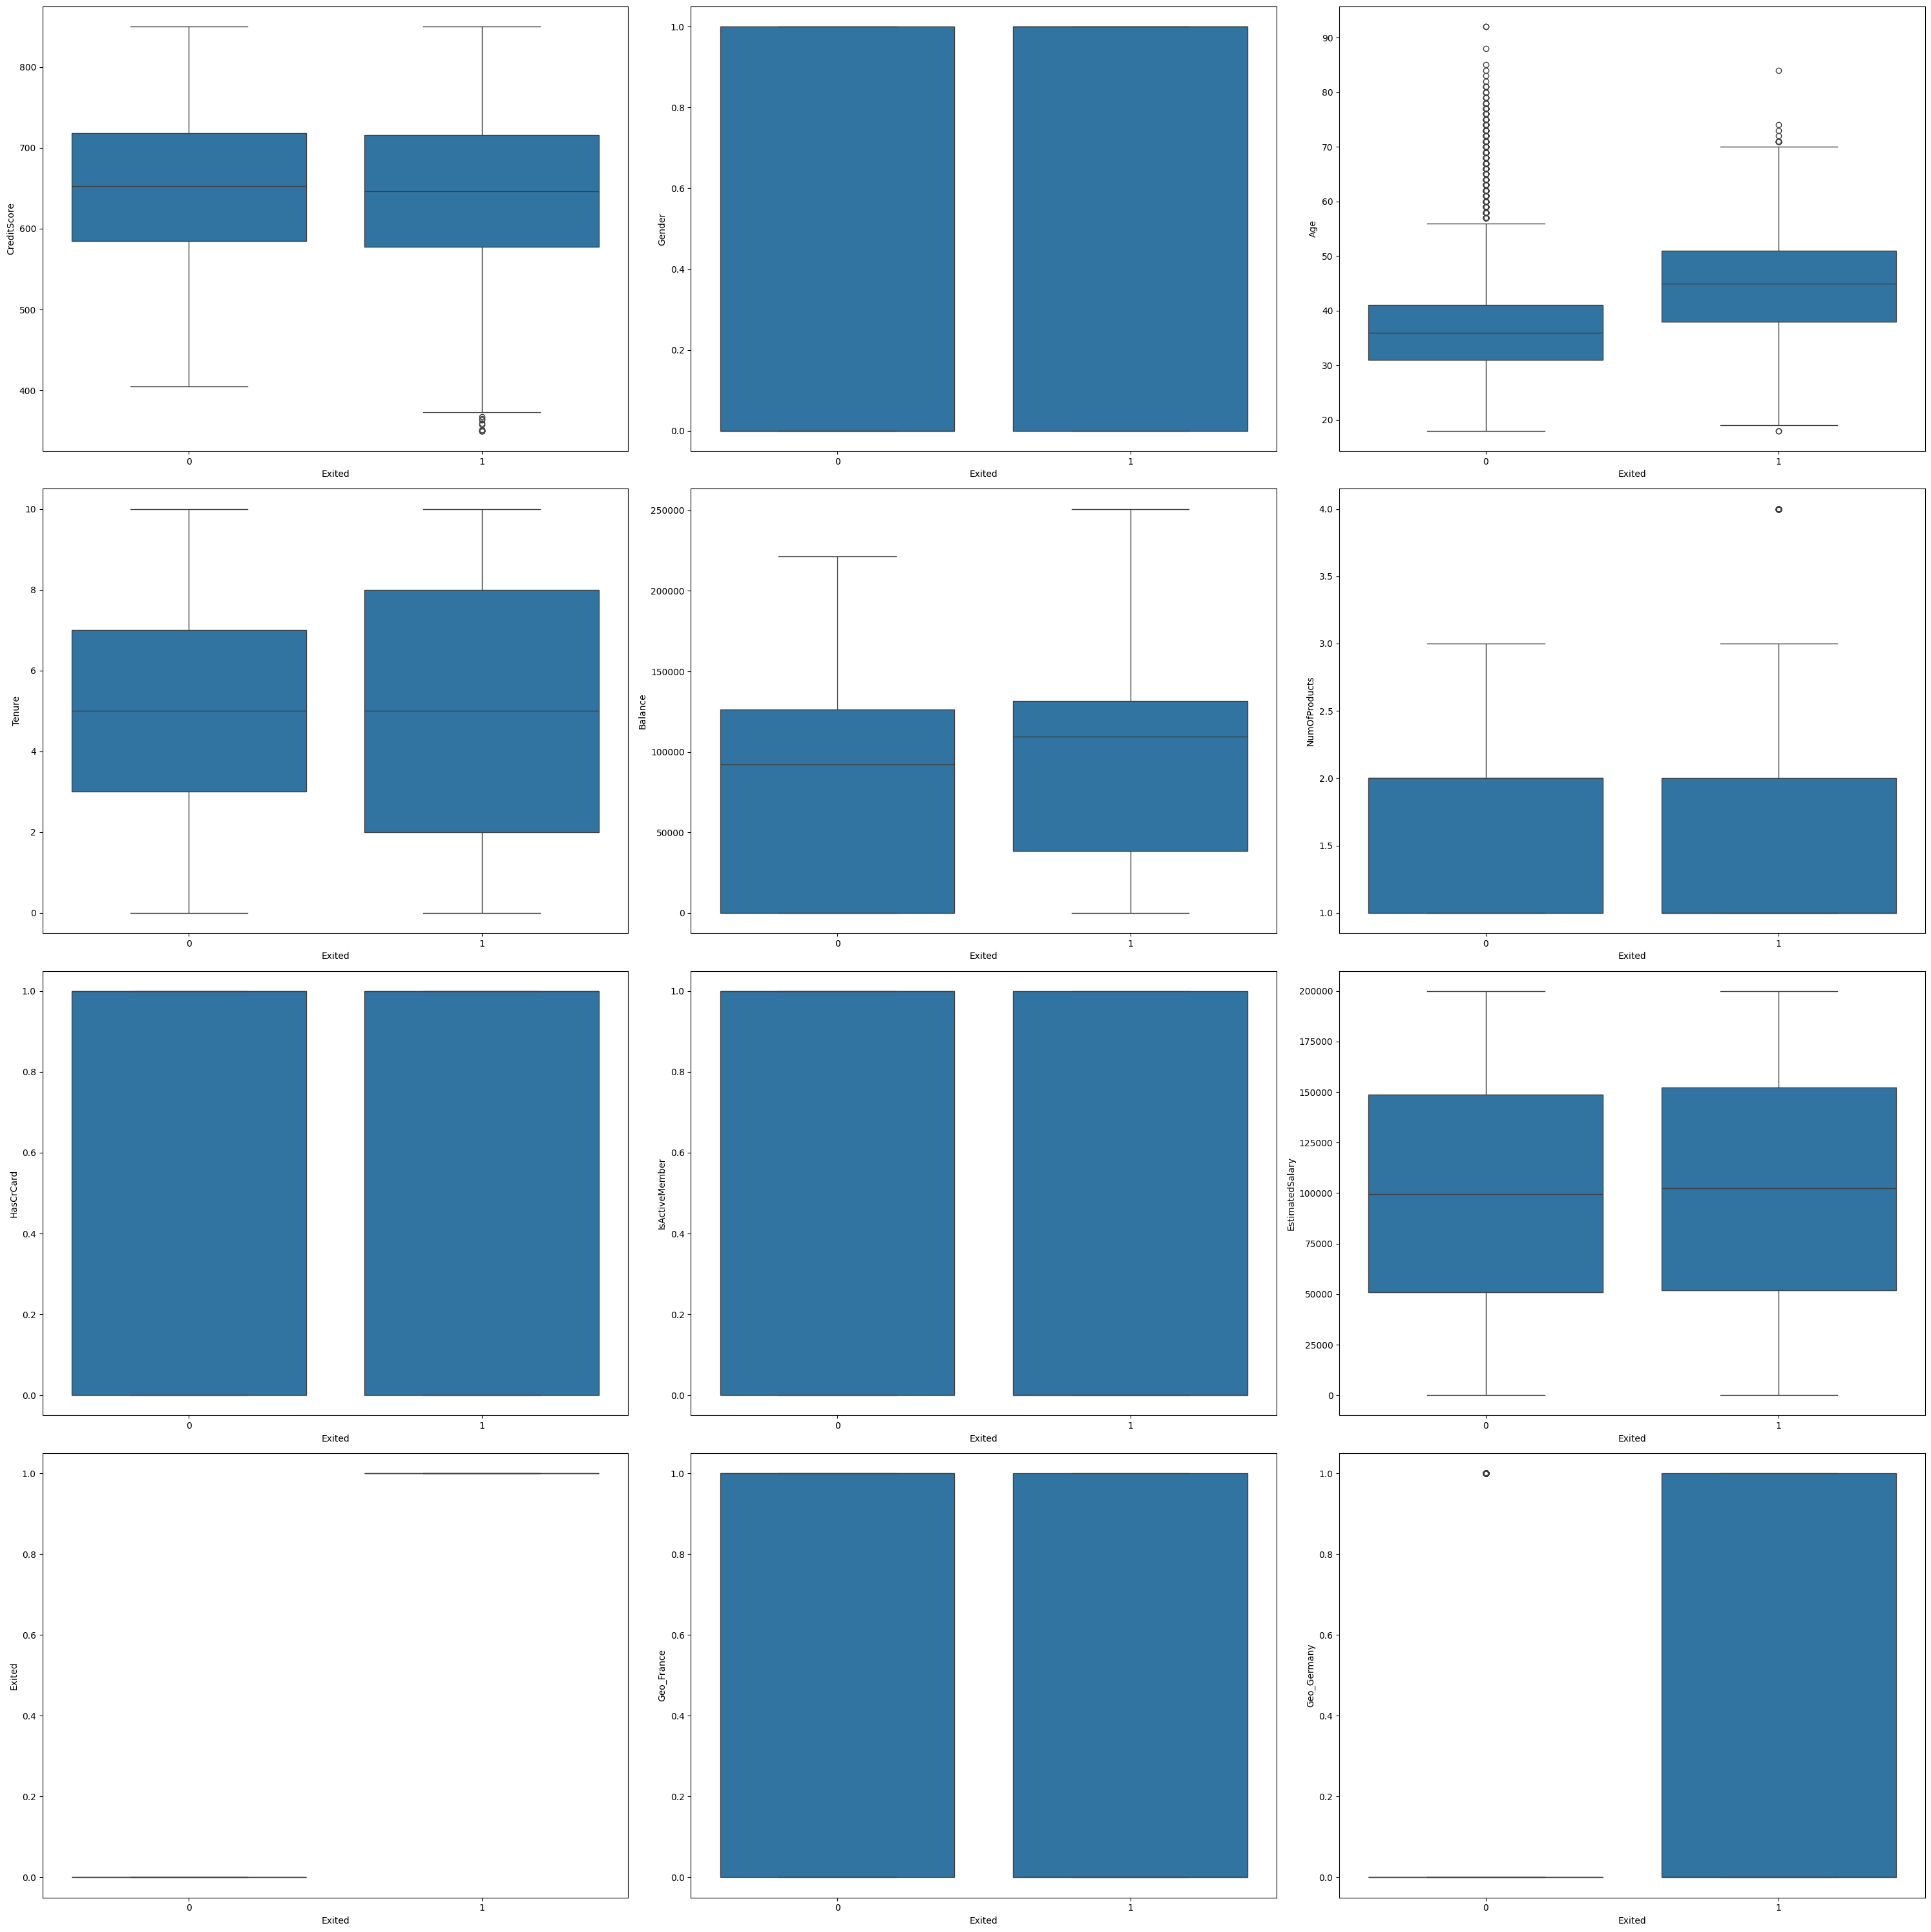

In [16]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize= (30,30))
row =0
col = 0
for i in range(len(df.columns) -1):
  if col > 2:
    row += 1
    col = 0
  axes = ax[row,col]
  sns.boxplot(x = df['Exited'], y = df[df.columns[i]],ax = axes)
  col += 1
plt.tight_layout()
plt.show()

In [17]:
y = df.Exited
X =df.drop(['Exited'], axis=1)

In [18]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


## SPLITTING THE DATA INTO TRAIN & TEST

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)


## Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Sequential model to initialize our ANN & dense module to build the layers
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 100,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_dim = 12))

# Adding the second hidden layer
model.add(Dense(units = 150,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 200,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the fourth  hidden layer
model.add(Dense(units = 200,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 100,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1,
                kernel_initializer = 'uniform',
                activation = 'sigmoid'))





In [22]:
# COmpile the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 200)               30200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 107,051
Trainable params: 107,051
Non-trai

In [24]:
# Fitting the ANN to the training set
EPOCHS = 100
BATCH_SIZE = 64

# TRAIN MODEL
H = model.fit(X_train,
              y_train,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              validation_split = 0.2,
              verbose = 1)


Epoch 1/100
84/84 [==============================] - 4s 18ms/step - loss: 0.5037 - accuracy: 0.7888 - val_loss: 0.4296 - val_accuracy: 0.8000
Epoch 2/100
84/84 [==============================] - 1s 12ms/step - loss: 0.4220 - accuracy: 0.7974 - val_loss: 0.3985 - val_accuracy: 0.8000
Epoch 3/100
84/84 [==============================] - 1s 13ms/step - loss: 0.3858 - accuracy: 0.8371 - val_loss: 0.3714 - val_accuracy: 0.8440
Epoch 4/100
84/84 [==============================] - 1s 14ms/step - loss: 0.3544 - accuracy: 0.8547 - val_loss: 0.3547 - val_accuracy: 0.8463
Epoch 5/100
84/84 [==============================] - 1s 11ms/step - loss: 0.3474 - accuracy: 0.8621 - val_loss: 0.3501 - val_accuracy: 0.8657
Epoch 6/100
84/84 [==============================] - 2s 20ms/step - loss: 0.3456 - accuracy: 0.8621 - val_loss: 0.3408 - val_accuracy: 0.8664
Epoch 7/100
84/84 [==============================] - 2s 19ms/step - loss: 0.3387 - accuracy: 0.8642 - val_loss: 0.3491 - val_accuracy: 0.8649
Epoch 

In [25]:
H.history

{'loss': [0.5037387013435364,
  0.42197877168655396,
  0.38576313853263855,
  0.3543805778026581,
  0.3473954200744629,
  0.345581978559494,
  0.3386515974998474,
  0.3357013463973999,
  0.3349495232105255,
  0.3277251422405243,
  0.32581499218940735,
  0.3283623456954956,
  0.3215559422969818,
  0.3182142674922943,
  0.31370607018470764,
  0.30998870730400085,
  0.3080841600894928,
  0.3043641149997711,
  0.30891838669776917,
  0.29689744114875793,
  0.29705044627189636,
  0.29050812125205994,
  0.2927328646183014,
  0.2830538749694824,
  0.28283965587615967,
  0.27759939432144165,
  0.2719094455242157,
  0.2683209776878357,
  0.2647293210029602,
  0.25927162170410156,
  0.252716600894928,
  0.250848650932312,
  0.24369998276233673,
  0.24386997520923615,
  0.23173975944519043,
  0.22453337907791138,
  0.23405574262142181,
  0.22705312073230743,
  0.2142304629087448,
  0.20391742885112762,
  0.1966577172279358,
  0.20202261209487915,
  0.19920240342617035,
  0.18278349936008453,
  0.1

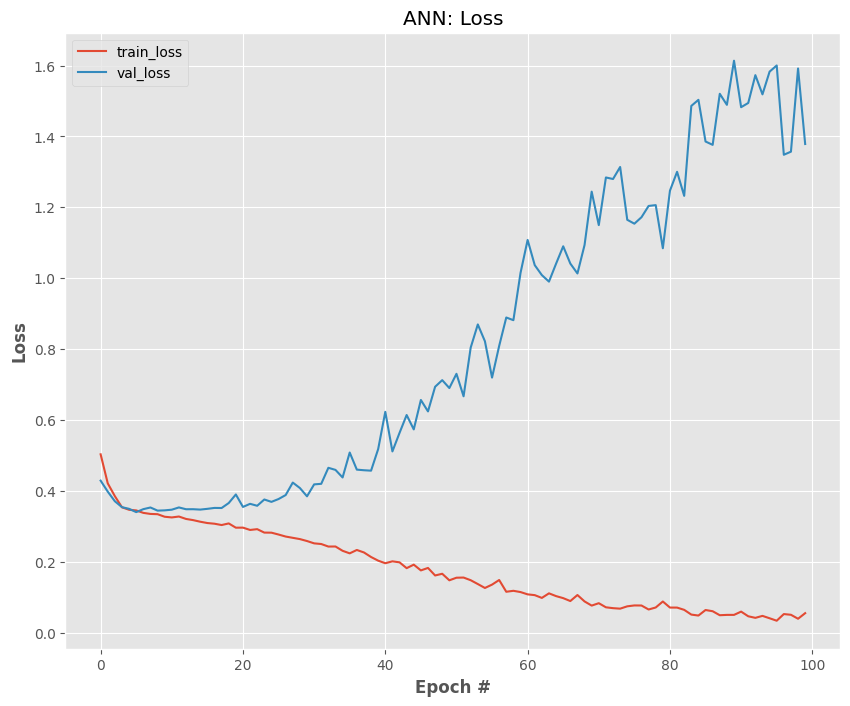

In [26]:
# Plot the training & validation loss
N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label = "train_loss")
plt.plot(N, H.history["val_loss"], label ="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight ="bold")
plt.ylabel("Loss", weight = "bold")
plt.legend()
plt.show()

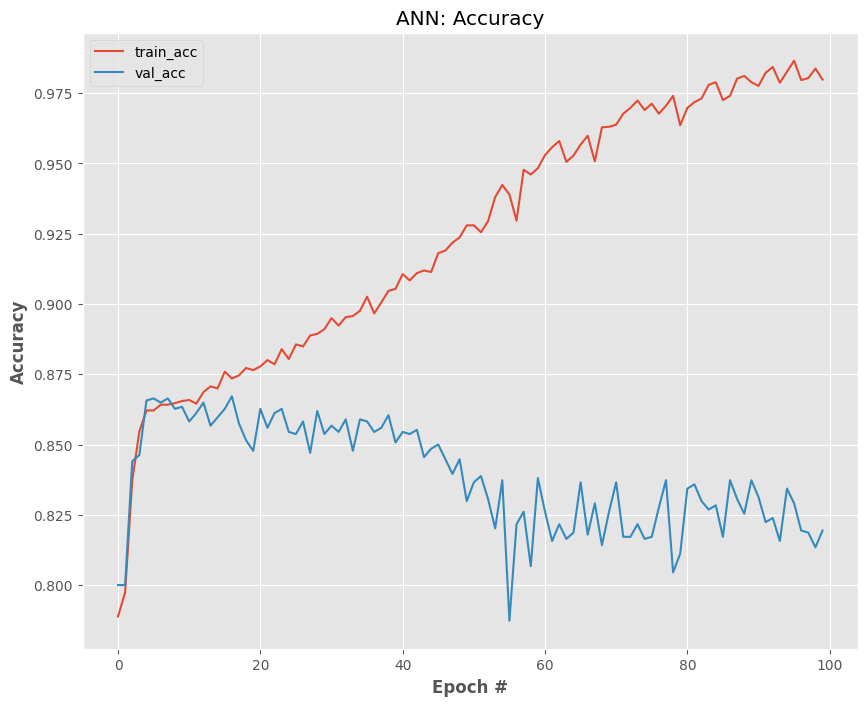

In [27]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [28]:
score, acc = model.evaluate(X_train, y_train, batch_size =10)
print('Train score:', score)
print('Train accuracy:', acc)


670/670 [==============================] - 2s 2ms/step - loss: 0.3087 - accuracy: 0.9524
Train score: 0.30870702862739563
Train accuracy: 0.9523880481719971


## PART 3 - MAKING PREDICTION & EVALUATING THE MODEL

In [29]:
# PREDICTING THE TEST RESULTS
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print('*'*20)
score, acc= model.evaluate(X_test, y_test, batch_size =10)
print('Test score:', score)
print('Test accuracy:', acc)

104/104 [==============================] - 0s 3ms/step
********************
330/330 [==============================] - 1s 4ms/step - loss: 1.3948 - accuracy: 0.8070
Test score: 1.3948079347610474
Test accuracy: 0.8069697022438049


## MAKING CONFUSION MATRIX

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## EVALUATION MATRIX

Text(0.5, 23.52222222222222, 'Predicted label')

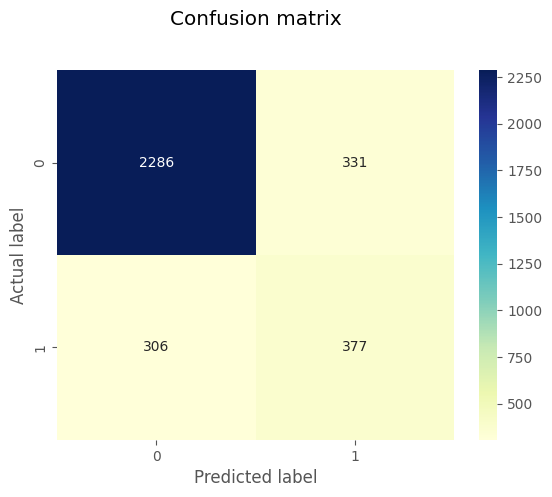

In [31]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt ='g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
# Import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2617
           1       0.53      0.55      0.54       683

    accuracy                           0.81      3300
   macro avg       0.71      0.71      0.71      3300
weighted avg       0.81      0.81      0.81      3300



104/104 [==============================] - 0s 2ms/step


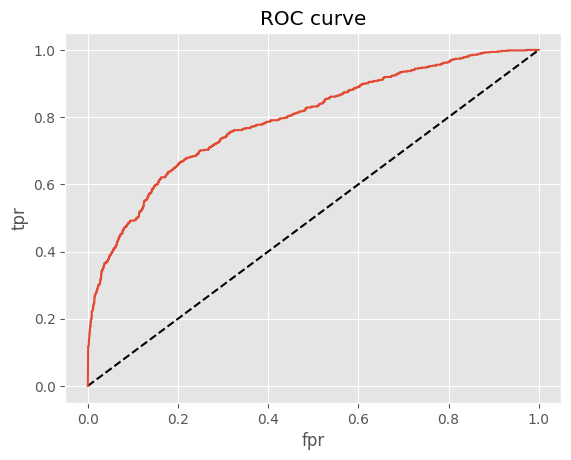

In [33]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [34]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7928769600276601

In [35]:
!pip install keras==2.12.0 # restart session after installing

## Part 4 - Evaluating, Improving and Tuning the ANN

In [36]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 64, epochs = 50,verbose=1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/50


<ipython-input-36-f450e423a041>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, batch_size = 64, epochs = 50,verbose=1)


95/95 [==============================] - 2s 4ms/step - loss: 0.6702 - accuracy: 0.7945
Epoch 2/50
95/95 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7992
Epoch 3/50
95/95 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.7992
Epoch 4/50
95/95 [==============================] - 0s 4ms/step - loss: 0.4372 - accuracy: 0.7992
Epoch 5/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7992
Epoch 6/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7992
Epoch 7/50
95/95 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7992
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7992
Epoch 9/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7992
Epoch 10/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7992
Epoch 11/50
95/95 [===========

In [37]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.8370149195194244
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.011955223369485008


### Deviation is very low so I'd say that it is unlikely to be an overfitted model. With different training sets it got the mean with all training results is still very close to the above model.

##  Improving ANN with Dropout layer

### Dropout Regularization is used to reduce overfitting if needed.
p is the fraction of input units to drop. If suppose there are ten neurons from a layer and p is 0.1 then one of the neurons would be disabled and its output would not be sent to the further layer.
It is advisable to start with p 0.1 and move to higher values when in case the overfitting problem persists. Also going over 0.5 is not advisable generally because it may cause underfitting as most of the neurons are disabled.

In [38]:
# Improving the ANN
from tensorflow.keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 64, epochs = 50,verbose = 1)

Epoch 1/50
105/105 [==============================] - 4s 13ms/step - loss: 0.6652 - accuracy: 0.7961
Epoch 2/50
105/105 [==============================] - 1s 10ms/step - loss: 0.5298 - accuracy: 0.7979
Epoch 3/50
105/105 [==============================] - 1s 8ms/step - loss: 0.4501 - accuracy: 0.7979
Epoch 4/50
105/105 [==============================] - 1s 6ms/step - loss: 0.4453 - accuracy: 0.7979
Epoch 5/50
105/105 [==============================] - 1s 7ms/step - loss: 0.4392 - accuracy: 0.7979
Epoch 6/50
105/105 [==============================] - 1s 8ms/step - loss: 0.4361 - accuracy: 0.7979
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.7979
Epoch 8/50
105/105 [==============================] - 1s 5ms/step - loss: 0.4337 - accuracy: 0.7979
Epoch 9/50
105/105 [==============================] - 1s 6ms/step - loss: 0.4336 - accuracy: 0.7979
Epoch 10/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.79

In [39]:
# Part 3 - Making predictions and evaluating the model

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

670/670 [==============================] - 4s 5ms/step - loss: 0.4103 - accuracy: 0.8300
Train score: 0.4102741777896881
Train accuracy: 0.8299999833106995
104/104 [==============================] - 1s 4ms/step
********************
330/330 [==============================] - 1s 4ms/step - loss: 0.4157 - accuracy: 0.8312
Test score: 0.41569527983665466
Test accuracy: 0.8312121033668518


Text(0.5, 23.52222222222222, 'Predicted label')

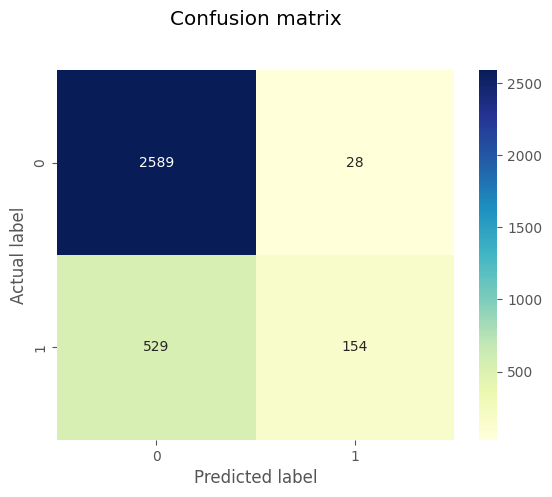

In [40]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2617
           1       0.85      0.23      0.36       683

    accuracy                           0.83      3300
   macro avg       0.84      0.61      0.63      3300
weighted avg       0.83      0.83      0.79      3300



104/104 [==============================] - 0s 2ms/step


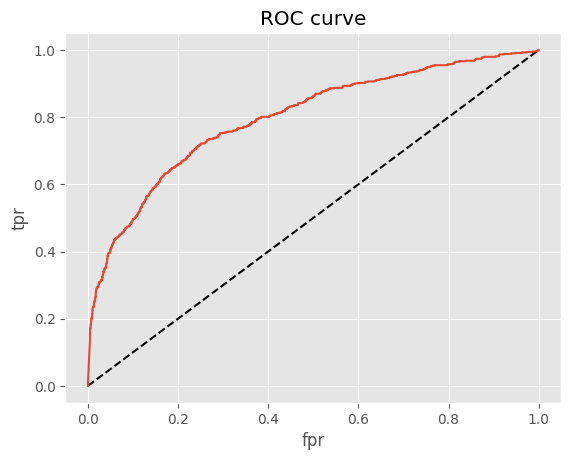

In [42]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [43]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7975720189704552

## Tuning the ANN

### Let's test 2 values of the batch size and we're gonna try 25 and 32. So why 25 and 32? Well, that's based on my experience and that's also common practice to take powers of 2. Well, you can try other values of the batch size as well.

In [ ]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

<ipython-input-44-deceb5a65db3>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


21/21 [==============================] - 0s 2ms/step


In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))